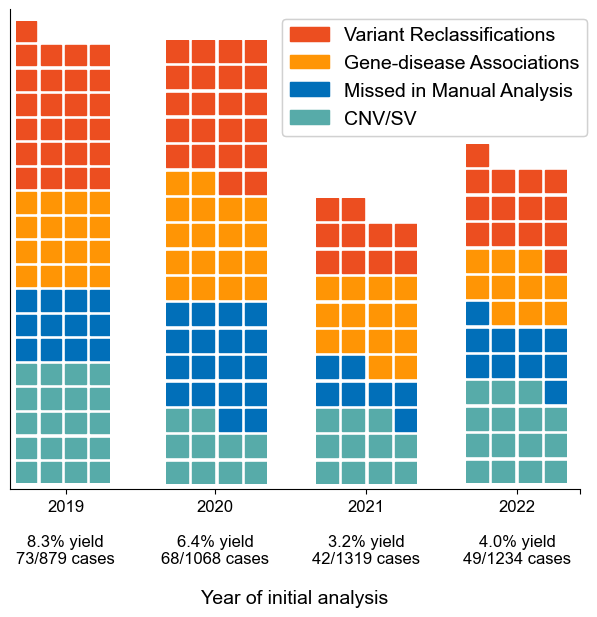

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
import matplotlib.patches as mpatches

plt.rcParams['font.family'] = 'Arial'

# Read the CSV file into a DataFrame
data = pd.read_csv('../../Data/Fig4/Talos_solves_by_year-prospective_261128.csv', header=0, index_col=[1, 0], usecols=range(1, 7))
# data = pd.read_csv('../../Data/Fig4/Talos_solves_VCGS-prospective-by-year.csv', header=0, index_col=[1, 0], usecols=range(1, 7))

# Combine duplicate rows by summing their values
data_combined = data.groupby(level=[0, 1]).sum()

# Custom sort order for the index
custom_sort = {'New Gene Information': 4, 'New Variant Information': 3, 'Missed in Manual Analysis': 2, 'CNV/SV': 1}

# Sort the DataFrame by the custom sort order
data_sorted = data_combined.sort_index(key=lambda x: x.map(custom_sort))

colors_list_reversed_flat = [
               '#57ABA9', #teal light
               '#57ABA9',
               '#016FB9', #azul original
               '#016FB9',
               '#016FB9',
               '#016FB9',
               '#FF9505', #orange original
               '#FF9505',
               '#EC4E20', #flame original
               '#EC4E20',
               '#EC4E20']

colors_list_short = [
               '#EC4E20', #flame original
               '#FF9505', #orange original
               '#016FB9', #azul original
               '#57ABA9'] #teal light


number_of_bars = len(data_sorted.columns) # one bar per year

# Init the whole figure and axes
fig, axs = plt.subplots(nrows=1,
                        ncols=number_of_bars,
                        figsize=(6,6),)

# Iterate over each bar and create it
custom_offset = [-0.041, -0.024, 0.108, 0.062] # height offset for each bar
for i,ax in enumerate(axs):
    l = ax.get_position()
    ax.set_position([(0.25*i), (0.1-custom_offset[i]), l.width, l.height])
    ax.set_aspect('equal')
    col_name = data_sorted.columns[i]
    values = data_sorted[col_name] # values from the i-th column

    Waffle.make_waffle(
        ax=ax,  # pass axis to make_waffle
        #title={"label": col_name, "loc": "left"},
        columns=4,
        values=values,
        vertical=True,
        colors=colors_list_reversed_flat,
        rounding_rule='ceil',
        figsize=(5, 5)
    )

ax1 = fig.add_axes([-0.01, 0.13, 0.95, 0.8])
ax1.patch.set_alpha(0)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.yaxis.set_visible(False)

# Create legend for colors
patches = []
for x in range(len((data_sorted.index.get_level_values(0)).unique())):
    labels = list((data_sorted.index.get_level_values(0)).unique())
    rlabels = list(reversed(labels))
    patches.append(mpatches.Patch(color=colors_list_short[x], label=rlabels[x]))
# plt.legend(handles=patches, bbox_to_anchor=(4,2), loc="lower left")

legend1 = plt.legend(handles=patches, loc="upper right", fontsize=14, bbox_to_anchor=(1.03,1))
fig.add_artist(legend1)

# # Create an additional legend explaining 1 block = 1 case
# b2=ax1.plot([], marker="s", markersize=16, linestyle="", color="gray",  label="1 block equals 1 case")
# ax1.legend(handles=b2, frameon=False, fontsize=12, loc="upper right", bbox_to_anchor=(1, 0.78))

# Set custom x-axis ticks and labels
ax1.set_xticks([0.098, 0.36, 0.625, 0.89, 1])
ax1.set_xticklabels(['2019\n \n8.3% yield\n73/879 cases\n', '2020\n \n6.4% yield\n68/1068 cases\n',
                      '2021\n \n3.2% yield\n42/1319 cases\n', '2022\n \n4.0% yield\n49/1234 cases\n', ''], fontsize=12)
ax1.set_xlabel('Year of initial analysis', fontsize=14)

#fig.savefig('../../Figures/Fig4/Fig4_by_year_tall.png', bbox_inches='tight')
fig.savefig('../../Figures/Fig3/Fig3_panel_C.pdf', bbox_inches='tight')

plt.show()

/var/folders/5j/v8r54md10256xd71nn4pd54m0000gn/T/ipykernel_84833/1253975488.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.xticks(pd.date_range(start="2022", end="2025", freq='3M'))


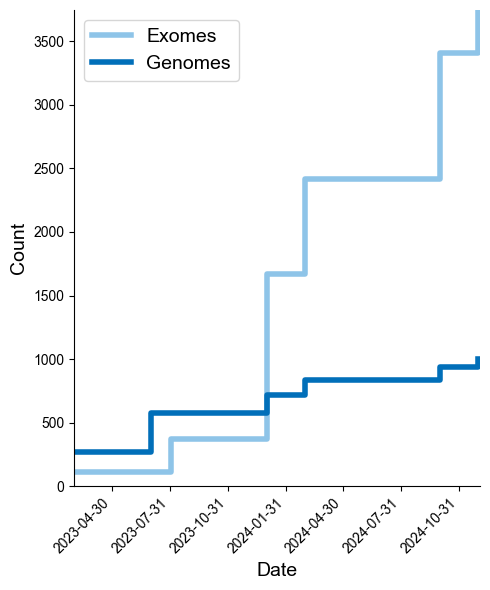

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

Genomes_color = '#016FB9' # Azul
Exomes_color = '#8EC4E8' # Light Azul

# set plot size
plt.rcParams['figure.figsize'] = [5,6]
plt.rcParams['font.family'] = 'Arial'

# read csv file with the data
data = pd.read_csv('../../Data/Fig4/Data_aggregation_timeline.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%b-%y')
dates = data['Date']
genomes = data['Genomes']
exomes = data['Exomes']

# Add a small offset to the dates of the Exomes data to stagger the series
offset_days = 3
data['Exomes_Date'] = data['Date'] + pd.to_timedelta(offset_days, unit='d')

# Plot the data
plt.step(data['Date'], data['Exomes'], label='Exomes', where='post', color=Exomes_color, linewidth=4)
#plt.fill_between(data['Exomes_Date'], data['Exomes'], step='post', alpha=0.8, color=Exomes_color)
plt.step(data['Date'], data['Genomes'], label='Genomes', where='post', color=Genomes_color, linewidth=4)
#plt.fill_between(data['Date'], data['Genomes'], step='post', alpha=1, color=Genomes_color)


# Add labels and title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)
#plt.title('Accumulation of Genomes and Exomes from March 2023 to December 2024')
# Add a legend
plt.legend(loc='upper left', fontsize=14)

# Thin and rotate x-axis labels for better readability
plt.xticks(pd.date_range(start="2022", end="2025", freq='3M'))
plt.xticks(rotation=45, ha='right')


# erase the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# set x and y limits
plt.xlim(data['Date'].min(), data['Exomes_Date'].max())
plt.ylim(0, data[['Genomes', 'Exomes']].values.max())


# Show and save the plot
plt.tight_layout()
#plt.savefig('../../Figures/Fig/Fig4_data_aggregation_step_lines_tall.png')
plt.savefig('../../Figures/Fig3/Fig3_panel_B.pdf')

plt.show()

<>:68: SyntaxWarning: invalid escape sequence '\m'
<>:69: SyntaxWarning: invalid escape sequence '\m'
<>:101: SyntaxWarning: invalid escape sequence '\m'
<>:102: SyntaxWarning: invalid escape sequence '\m'
<>:132: SyntaxWarning: invalid escape sequence '\m'
<>:134: SyntaxWarning: invalid escape sequence '\m'
<>:68: SyntaxWarning: invalid escape sequence '\m'
<>:69: SyntaxWarning: invalid escape sequence '\m'
<>:101: SyntaxWarning: invalid escape sequence '\m'
<>:102: SyntaxWarning: invalid escape sequence '\m'
<>:132: SyntaxWarning: invalid escape sequence '\m'
<>:134: SyntaxWarning: invalid escape sequence '\m'
/var/folders/5j/v8r54md10256xd71nn4pd54m0000gn/T/ipykernel_84833/2704708073.py:68: SyntaxWarning: invalid escape sequence '\m'
  annotate(ax0, 2022.4, 5.3, "$\mathbf{CTR9}$ published", fc='#F2805F')
/var/folders/5j/v8r54md10256xd71nn4pd54m0000gn/T/ipykernel_84833/2704708073.py:69: SyntaxWarning: invalid escape sequence '\m'
  annotate(ax0, 2022.45, 3.8, "$\mathbf{CTR9}$ added t

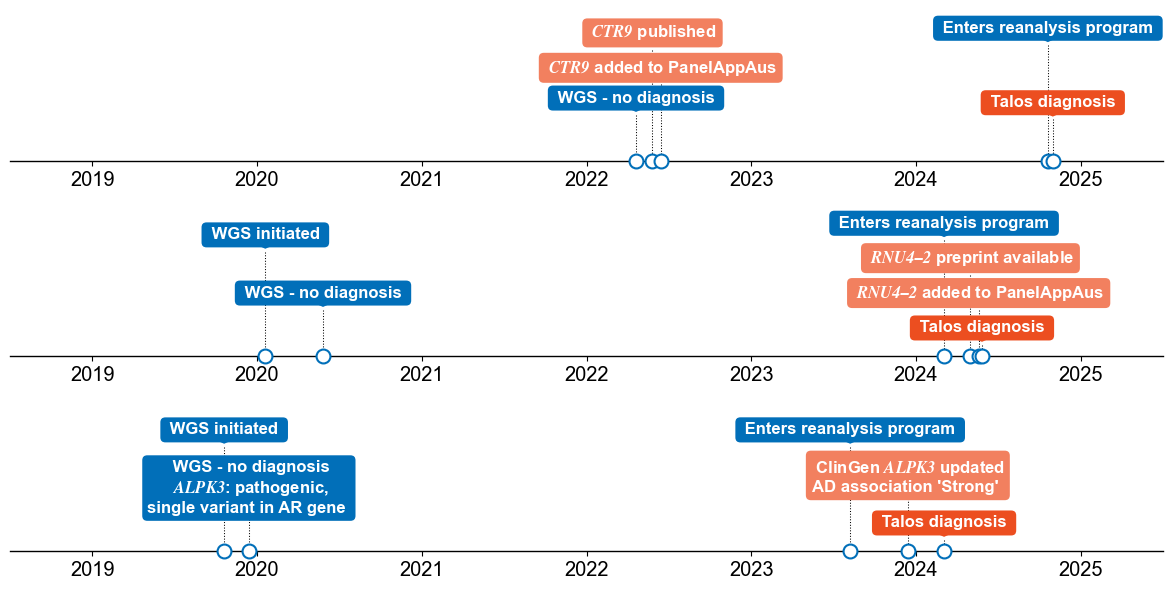

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle, FancyBboxPatch

plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'STIXGeneral:italic'
plt.rcParams['mathtext.bf'] = 'STIXGeneral:italic:bold'
plt.rcParams['text.usetex'] = False
#plt.rcParams['text.usetex'] = True

ax_font_size = "x-large"
annotation_font_size = "large"
point_border_width = 1.5
point_size = 100

# Annotation Style borrowed from:
# "Scientific Visualisation - Python & Matplotlib" by Nicolas P. Rougier
# BSD License
def annotate(ax, x, y, text, fc="#016FB9", y0=0):
    y = y - 0.5
    ax.annotate(
        " " + text + " ",
        xy=(x, y),
        xycoords="data",
        xytext=(0, 12),
        textcoords="offset points",
        color="white",
        size=annotation_font_size,
        va="center",
        ha="center",
        weight="bold",
        bbox=dict(boxstyle="round", fc=fc, ec="none"),
        arrowprops=dict(
            arrowstyle="wedge,tail_width=3", lw = 3, fc=fc, ec="none", patchA=None
        ),
    )
    plt.plot([x, x], [y, y0], color="black", linestyle=":", linewidth=0.75)

# Create a figure with a custom layout using gridspec
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])

#Generate timeline 0
ax0 = fig.add_subplot(gs[0], xlim=(2018.5, 2025.5), ylim=(0, 6.5), yticks=([]))
ax0.tick_params("x", labelsize=ax_font_size, which="major")
plt.plot([2018.5, 2025.5], [0, 0], color="black", linewidth=1.0, clip_on=False)

# Add points to timeline 0
X = [2016, 2022.3, 2022.4, 2022.45, 2024.8, 2024.83]
Y = np.zeros(len(X))
plt.scatter(
    X,
    Y,
    s=point_size,
    linewidth=point_border_width,
    zorder=10,
    clip_on=False,
    edgecolor="#016FB9",
    facecolor="white",
)

annotate(ax0, 2016, 5.5, "Birth of patient")
annotate(ax0, 2022.3, 2.5, "WGS - no diagnosis")
annotate(ax0, 2022.4, 5.3, "$\mathbf{CTR9}$ published", fc='#F2805F')
annotate(ax0, 2022.45, 3.8, "$\mathbf{CTR9}$ added to PanelAppAus", fc='#F2805F')
annotate(ax0, 2024.8, 5.5, "Enters reanalysis program")
annotate(ax0, 2024.83, 2.3, "Talos diagnosis", fc="#EC4E20")

ax0.spines["right"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.set_xticks(np.arange(2019, 2026, 1))

#Generate timeline 1
ax1 = fig.add_subplot(gs[1], xlim=(2018.5, 2025.5), ylim=(0, 6.5), yticks=([]))
ax1.tick_params("x", labelsize=ax_font_size, which="major")
plt.plot([2018.5, 2025.5], [0, 0], color="black", linewidth=1.0, clip_on=False)

# Add points to timeline 1
X = [2020.05,2020.4,2024.17, 2024.33, 2024.38, 2024.40]
Y = np.zeros(len(X))
plt.scatter(
    X,
    Y,
    s=point_size,
    linewidth=point_border_width,
    zorder=10,
    clip_on=False,
    edgecolor="#016FB9",
    facecolor="white",
)

annotate(ax1, 2020.05, 5, "WGS initiated")
annotate(ax1, 2020.4, 2.5, "WGS - no diagnosis")
annotate(ax1, 2024.17, 5.5, "Enters reanalysis program")
annotate(ax1, 2024.33, 4, "$\mathbf{RNU4‒2}$ preprint available", fc='#F2805F')
annotate(ax1, 2024.38, 2.5, "$\mathbf{RNU4‒2}$ added to PanelAppAus", fc='#F2805F')
annotate(ax1, 2024.40, 1, "Talos diagnosis", fc="#EC4E20")

ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.set_xticks(np.arange(2019, 2026, 1))

#Generate timeline 2
ax2 = fig.add_subplot(gs[2], xlim=(2018.5, 2025.5), ylim=(0, 6.5), yticks=([]))
ax2.tick_params("x", labelsize=ax_font_size, which="major")
plt.plot([2018.5, 2025.5], [0, 0], color="black", linewidth=1.0, clip_on=False)

# Add points to timeline 1
X = [2019.8, 2019.95, 2023.6, 2023.95, 2024.17]
Y = np.zeros(len(X))
plt.scatter(
    X,
    Y,
    s=point_size,
    linewidth=point_border_width,
    zorder=10,
    clip_on=False,
    edgecolor="#016FB9",
    facecolor="white",
)

annotate(ax2, 2019.8, 5, "WGS initiated")
annotate(ax2, 2019.95, 1.85, "", y0=2) # Add a blank annotation to make the pointer complete
annotate(ax2, 2019.95, 2.5, "WGS - no diagnosis\n $\mathbf{ALPK3}$: pathogenic,\nsingle variant in AR gene")
annotate(ax2, 2023.6, 5, "Enters reanalysis program")
annotate(ax2, 2023.95, 3, "ClinGen $\mathbf{ALPK3}$ updated\nAD association \'Strong\'", fc='#F2805F')
annotate(ax2, 2024.17, 1, "Talos diagnosis", fc="#EC4E20")

ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.set_xticks(np.arange(2019, 2026, 1))

# Show and save the plot
plt.tight_layout()
# plt.savefig('../../Figures/Fig4/Fig4_timelines.png')
plt.show()